In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import collections
%matplotlib inline

In [2]:
limitbook_full = pd.read_csv("sample_haas_20191231/limitbook_full-level2/562-BITSTAMP_SPOT_BTC_USD.csv.gz", sep=';')

In [3]:
limitbook_full['time_coinapi'].unique()[:10]

array(['00:00:57.3936616', '00:00:55.0622593', '00:00:56.1248294',
       '00:00:57.2030069', '00:00:58.0467898', '00:00:58.5937024',
       '00:00:59.3906241', '00:01:00.5312995', '00:01:01.5626072',
       '00:01:02.6720524'], dtype=object)

In [4]:
limitbook_full = limitbook_full[limitbook_full['time_exchange'] != '00:00:54.0000000'].reset_index(drop=True)

In [5]:
limitbook_full[limitbook_full['time_coinapi'] == limitbook_full['time_coinapi'].min()].iloc[0]

time_exchange    23:59:58.0000000
time_coinapi     00:00:00.2170139
update_type                   ADD
is_buy                          0
entry_px                  3696.44
entry_sx                 0.291796
Name: 2361982, dtype: object

In [6]:
limitbook_full['time_coinapi'].iloc[:2361982] = '2018-12-31T' + limitbook_full['time_coinapi'].iloc[:2361982]
limitbook_full['time_coinapi'].iloc[2361982:] = '2019-01-01T' + limitbook_full['time_coinapi'].iloc[2361982:]
limitbook_full['time_coinapi'] = pd.to_datetime(limitbook_full['time_coinapi'])

D:\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [7]:
limitbook_full[limitbook_full['time_coinapi'] > limitbook_full['time_coinapi'][::-1].cummin()[::-1]]['time_coinapi']

39681     2018-12-31 00:11:53.327252800
39682     2018-12-31 00:11:53.327252800
39683     2018-12-31 00:11:53.327252800
39684     2018-12-31 00:11:53.327252800
39685     2018-12-31 00:11:53.327252800
39686     2018-12-31 00:11:53.327252800
39687     2018-12-31 00:11:53.327252800
39688     2018-12-31 00:11:53.327252800
39689     2018-12-31 00:11:53.327252800
39690     2018-12-31 00:11:53.327252800
39691     2018-12-31 00:11:53.327252800
39692     2018-12-31 00:11:53.327252800
39693     2018-12-31 00:11:53.327252800
39694     2018-12-31 00:11:53.327252800
39695     2018-12-31 00:11:53.327252800
43613     2018-12-31 00:18:58.140510000
43614     2018-12-31 00:18:58.140510000
72610     2018-12-31 00:33:13.822210100
72611     2018-12-31 00:33:13.822210100
72612     2018-12-31 00:33:13.822210100
72613     2018-12-31 00:33:13.822210100
72614     2018-12-31 00:33:13.822210100
72615     2018-12-31 00:33:13.822210100
72616     2018-12-31 00:33:13.822210100
72617     2018-12-31 00:33:13.822210100


In [8]:
limitbook_full = limitbook_full.sort_values('time_coinapi', kind='mergesort').reset_index(drop=True)

In [9]:
trade = pd.read_csv("sample_haas_20191231/trades-level1/562-BITSTAMP_SPOT_BTC_USD.csv.gz", sep=';')

In [10]:
trade['time_coinapi'] = pd.to_datetime(trade['time_coinapi'])
trade = trade.sort_values('time_coinapi', kind='mergesort').reset_index(drop=True)

In [11]:
quote = pd.read_csv("sample_haas_20191231/quotes-level1/562-BITSTAMP_SPOT_BTC_USD.csv.gz", sep=';')

In [12]:
quote['time_coinapi'] = pd.to_datetime(quote['time_coinapi'])
quote = quote.sort_values('time_coinapi', kind='mergesort').reset_index(drop=True)

In [13]:
snapshot_1 = pd.read_csv("sample_haas_20191231/limitbook_snapshot_1-level1/562-BITSTAMP_SPOT_BTC_USD.csv.gz", sep=';')
snapshot_1.dropna(inplace=True)

In [14]:
snapshot_1['time_coinapi'] = pd.to_datetime('2018-12-31T' + snapshot_1['time_coinapi'])
snapshot_1 = snapshot_1.sort_values('time_coinapi', kind='mergesort').reset_index(drop=True)

In [15]:
snapshot_50 = pd.read_csv("sample_haas_20191231/limitbook_snapshot_50-level2/562-BITSTAMP_SPOT_BTC_USD.csv.gz", sep=';')
snapshot_50.dropna(inplace=True)

In [16]:
snapshot_50[snapshot_50['time_coinapi'] == snapshot_50['time_coinapi'].min()].iloc[0]

time_exchange     23:59:59.5138736
time_coinapi      00:00:00.2170139
asks[0].price              3694.92
asks[0].size                     1
bids[0].price              3693.85
bids[0].size               2.22103
asks[1].price              3695.35
asks[1].size                     3
bids[1].price              3689.26
bids[1].size              0.370756
asks[2].price              3696.44
asks[2].size              0.291796
bids[2].price              3687.37
bids[2].size                5.7321
asks[3].price              3697.45
asks[3].size              0.016297
bids[3].price              3687.22
bids[3].size                4.0644
asks[4].price              3698.78
asks[4].size             0.0135867
bids[4].price              3685.77
bids[4].size               4.80535
asks[5].price              3698.79
asks[5].size                     2
bids[5].price              3684.03
bids[5].size                   3.3
asks[6].price              3699.89
asks[6].size               5.15988
bids[6].price       

In [17]:
snapshot_50['time_coinapi'].iloc[:-1] = '2018-12-31T' + snapshot_50['time_coinapi'].iloc[:-1]
snapshot_50['time_coinapi'].loc[67903] = '2019-01-01T' + snapshot_50['time_coinapi'].loc[67903]
snapshot_50['time_coinapi'] = pd.to_datetime(snapshot_50['time_coinapi'])

D:\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [18]:
snapshot_50 = snapshot_50.sort_values('time_coinapi', kind='mergesort').reset_index(drop=True)

In [19]:
def snapshot_unstack(snapshot):
    '''
    unstack snapshot_50 to order flow format
    '''
    res = snapshot.melt(id_vars=['time_exchange', 'time_coinapi'])
    res['is_buy'] = res['variable'].map(lambda x: {'asks': 0, 'bids': 1}[x.split('[')[0]])
    res['group'] = res['variable'].map(lambda x: x.split('.')[0])
    res['column'] = res['variable'].map(lambda x: {'price': 'entry_px', 'size': 'entry_sx'}[x.split('.')[1]])
    res = res.pivot_table(index=['time_exchange', 'time_coinapi', 'is_buy', 'group'], columns='column', values='value').reset_index()
    return res

In [20]:
def snapshot_sample(snapshot, depth=50):
    '''
    sample orders within a given depth from snapshot in order flow format
    '''
    bid = snapshot[snapshot['is_buy'] == 1].sort_values('entry_px', ascending=False).iloc[:depth]
    ask = snapshot[snapshot['is_buy'] == 0].sort_values('entry_px', ascending=True).iloc[:depth]
    return bid.append(ask)

In [21]:
def reconstruct(snapshot, orderflow):
    '''
    reconstruct snapshot from original snapshot and the order flow during this period
    '''
    orderflow = orderflow.copy()
    orderflow['entry_sx'] = orderflow['entry_sx'] * orderflow['update_type'].map({'SUB': -1.0, 'ADD': 1.0})
    orderchange = orderflow.groupby(['entry_px', 'is_buy'])['entry_sx'].sum()
    orderchange = orderchange[orderchange.abs() > 1e-10].reset_index()
    snapshot = pd.merge(snapshot[['is_buy', 'entry_px', 'entry_sx']], orderchange, how='outer', on=['entry_px', 'is_buy'])
    snapshot['entry_sx'] = snapshot[['entry_sx_x', 'entry_sx_y']].sum(axis=1)
    snapshot = snapshot[['is_buy', 'entry_px', 'entry_sx']]
    snapshot = snapshot[snapshot['entry_sx'].abs() > 1e-10]
    return snapshot

In [22]:
def get_diff(snapshot1, snapshot2):
    '''
    given two snapshots, find the difference between them
    '''
    snapshot1 = set(tuple(row) for row in snapshot1[['is_buy', 'entry_px', 'entry_sx']].values.round(10))
    snapshot2 = set(tuple(row) for row in snapshot2[['is_buy', 'entry_px', 'entry_sx']].values.round(10))
    old = snapshot1 - snapshot2
    new = snapshot2 - snapshot1
    return old, new

In [23]:
limitbook_full['time_coinapi'].unique()[:5]

array(['2018-12-31T00:00:55.062259300', '2018-12-31T00:00:56.124829400',
       '2018-12-31T00:00:57.203006900', '2018-12-31T00:00:58.593702400',
       '2018-12-31T00:00:59.390624100'], dtype='datetime64[ns]')

In [24]:
def get_index_span(limitbook):
    '''
    given a full limit book, recognize the index positions of orders with 'update_type' == 'SNAPSHOT'
    '''
    limitbook_snapshot = limitbook[limitbook['update_type'] == 'SNAPSHOT']
    index_span = pd.DataFrame()
    index_span['snapshot_left'] = limitbook_snapshot.reset_index().groupby('time_coinapi', sort=False)['index'].first()
    index_span['snapshot_right'] = limitbook_snapshot.reset_index().groupby('time_coinapi', sort=False)['index'].last() + 1
    index_span['next_snapshot_left'] = index_span['snapshot_left'].shift(-1).fillna(-1).astype('int64')
    index_span['next_snapshot_right'] = index_span['snapshot_right'].shift(-1).fillna(-1).astype('int64')
    return index_span.reset_index()

In [25]:
def get_orderflow(limitbook):
    '''
    reconstruct the whole order book, from the original order book to order flow format
    '''
    index_span = get_index_span(limitbook)
    columns = ['time_coinapi', 'update_type', 'is_buy', 'entry_px', 'entry_sx']
    orderflow = pd.DataFrame(columns=columns)
    for i, row in index_span.iterrows():
        if i == 0:
            # set initial snapshot orders
            start = limitbook.iloc[row['snapshot_left'] : row['snapshot_right']][['time_coinapi', 'is_buy', 'entry_px', 'entry_sx']]
            start['update_type'] = 'SET'
            orderflow = orderflow.append(start)
        
        # add 'SUB', 'ADD' orders which are contained in the original full order book
        orderflow = orderflow.append(limitbook.iloc[row['snapshot_right'] : row['next_snapshot_left']][columns])
        
        if row['next_snapshot_left'] != -1:
            # deal with orders from one snapshot (reconstructed synthetically) to the other (which is contained in the original full order book)
            time_coinapi = limitbook_full['time_coinapi'].iloc[row['next_snapshot_left']]
            snapshot_constructed = reconstruct(limitbook.iloc[row['snapshot_left'] : row['snapshot_right']], limitbook.iloc[row['snapshot_right'] : row['next_snapshot_left']])
            old, new = get_diff(snapshot_constructed, limitbook.iloc[row['next_snapshot_left'] : row['next_snapshot_right']])
            old = pd.DataFrame(old, columns=['is_buy', 'entry_px', 'entry_sx'])
            new = pd.DataFrame(new, columns=['is_buy', 'entry_px', 'entry_sx'])
            transit = pd.merge(old, new, how='outer', on=['is_buy', 'entry_px'], suffixes=('_old', '_new'))

            old_NA = transit['entry_sx_old'].isnull()
            new_NA = transit['entry_sx_new'].isnull()
            transit['update_type'] = np.nan
            transit['entry_sx'] = np.nan
            transit.loc[old_NA, 'update_type'] = 'SET'  # new price level
            transit.loc[old_NA, 'entry_sx'] = transit['entry_sx_new'][old_NA]
            transit.loc[new_NA, 'update_type'] = 'SUB'  # cancel origin price level
            transit.loc[new_NA, 'entry_sx'] = transit['entry_sx_old'][new_NA]
            not_NA = ~(old_NA | new_NA)
            transit.loc[not_NA, 'update_type'] = (transit['entry_sx_new'][not_NA] > transit['entry_sx_old'][not_NA]).map({True: 'ADD', False: 'SUB'})  # volume change at original price level
            transit.loc[not_NA, 'entry_sx'] = (transit['entry_sx_new'][not_NA] - transit['entry_sx_old'][not_NA]).abs()
            transit['time_coinapi'] = time_coinapi
            
            orderflow = orderflow.append(transit[columns])
            
    return orderflow.reset_index(drop=True)

In [26]:
orderflow = get_orderflow(limitbook_full)

D:\Anaconda3\lib\site-packages\pandas\core\frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [27]:
orderflow.groupby('time_coinapi', sort=False)['entry_px'].count()

time_coinapi
2018-12-31 00:00:55.062259300    10570
2018-12-31 00:00:56.124829400       18
2018-12-31 00:00:57.203006900       10
2018-12-31 00:00:58.593702400       35
2018-12-31 00:00:59.390624100        8
2018-12-31 00:01:00.531299500       17
2018-12-31 00:01:01.562607200       13
2018-12-31 00:01:02.672052400       14
2018-12-31 00:01:03.765851800        6
2018-12-31 00:01:04.828409200       19
2018-12-31 00:01:05.969105400       21
2018-12-31 00:01:07.062908500       10
2018-12-31 00:01:08.141091700       23
2018-12-31 00:01:10.313075000       38
2018-12-31 00:01:11.453775000       29
2018-12-31 00:01:12.485109000       18
2018-12-31 00:01:13.578888300       13
2018-12-31 00:01:14.657088000       31
2018-12-31 00:01:15.719616900       15
2018-12-31 00:01:16.829059900        8
2018-12-31 00:01:17.938496500       15
2018-12-31 00:01:19.032304600        6
2018-12-31 00:01:20.126111800        7
2018-12-31 00:01:21.469936700       24
2018-12-31 00:01:22.298105300       29
2018-12-31 0

In [28]:
print(snapshot_1[snapshot_1['time_coinapi'].sort_values().values != snapshot_1['time_coinapi'].values])
print(trade[trade['time_coinapi'].sort_values().values != trade['time_coinapi'].values])
print(quote[quote['time_coinapi'].sort_values().values != quote['time_coinapi'].values])

Empty DataFrame
Columns: [time_exchange, time_coinapi, asks[0].price, asks[0].size, bids[0].price, bids[0].size]
Index: []
Empty DataFrame
Columns: [time_exchange, time_coinapi, guid, price, base_amount, taker_side]
Index: []
Empty DataFrame
Columns: [id_site_coinapi, time_exchange, time_coinapi, ask_px, ask_sx, bid_px, bid_sx]
Index: []


In [29]:
trade_unique = trade[['time_coinapi', 'price', 'base_amount', 'taker_side']]
#trade_unique.rename({'time_coinapi': 'time_coinapi_trade'}, axis='columns', inplace=True)
#trade_unique.drop_duplicates(inplace=True)
trade_unique = trade_unique.groupby(['time_coinapi', 'taker_side', 'price'])['base_amount'].sum().reset_index()

In [30]:
trade_unique_sell = trade_unique[trade_unique['taker_side'] == 'SELL']
trade_unique_buy = trade_unique[trade_unique['taker_side'] == 'BUY']
orderflow_bid = orderflow[(orderflow['update_type'] == 'SUB') & (orderflow['is_buy'] == 1)]
orderflow_ask = orderflow[(orderflow['update_type'] == 'SUB') & (orderflow['is_buy'] == 0)]
orderflow_bid = orderflow_bid[orderflow_bid['entry_px'].isin(trade_unique_sell['price'].unique())].sort_values('time_coinapi')
orderflow_ask = orderflow_ask[orderflow_ask['entry_px'].isin(trade_unique_buy['price'].unique())].sort_values('time_coinapi')
trade_unique_sell = trade_unique_sell[trade_unique_sell['price'].isin(orderflow_bid['entry_px'].unique())].sort_values('time_coinapi')
trade_unique_buy = trade_unique_buy[trade_unique_buy['price'].isin(orderflow_ask['entry_px'].unique())].sort_values('time_coinapi')

In [31]:
def concat_trade_orderflow(trade, orderflow, tolerance=None):
    '''
    concat trade table and orderflow table. The two table should share the same unique price.
    trade: trade table buy(sell) order
    orderflow: orderflow table where update_type == 'SUB', ask(bid) order
    tolerance: float, optional, default None; select asof tolerance within this range (unit: second).
    '''
    trade_orderflow = pd.DataFrame(columns=['entry_px', 'entry_sx', 'is_buy', 'time_coinapi_orderflow', 'update_type', 'action'])
    trade_index = []
    orderflow_index = []
    fail_to_fill_trade_index = []
    trade_iter = trade.iterrows()
    orderflow_iter = orderflow.iterrows()
    buff = collections.deque()
    buff_2 = collections.deque()
    
    def within_tolerance(timestamp1, timestamp2):
        if tolerance is None:
            return True
        else:
            return np.abs((timestamp1 - timestamp2).total_seconds()) < tolerance
    
    def before_tolerance(timestamp1, timestamp2):
        if tolerance is None:
            return False
        else:
            return (timestamp2 - timestamp1).total_seconds() >= tolerance
    
    def equal(x, y, tol=1e-3):
        return np.abs(x - y) < tol
    
    def less(x, y, tol=1e-3):
        return y - x > tol
    
    def partial_match(record_trade, record_orderflow):
        if record_trade['price'] == record_orderflow['entry_px']:
            record = record_orderflow.copy()
            if less(record_trade['base_amount'], record_orderflow['entry_sx']):  # partially fill, others cancel
                record['entry_sx'] = record_trade['base_amount']
                record_orderflow['entry_sx'] -= record_trade['base_amount']
                return 'P', record
            elif equal(record_trade['base_amount'], record_orderflow['entry_sx']):  # fully fill
                return 'F', record
            else:  # overkill
                record_trade['base_amount'] -= record_orderflow['entry_sx']
                return 'O', record
        else:
            return False, None
    
    def make_record(record, order_type):
        record['action'] = order_type
        return record
        
    count = 0
    for i_trade, record_trade in trade_iter:
        count += 1
        if count % 500 == 0:
            print(count)
        for record_orderflow in orderflow_iter:
            if before_tolerance(record_orderflow[1]['time_coinapi'], record_trade['time_coinapi']):
                trade_orderflow = trade_orderflow.append(make_record(record_orderflow[1], 'C'))  # cancel order
            elif within_tolerance(record_trade['time_coinapi'], record_orderflow[1]['time_coinapi']):
                buff.append(record_orderflow)
            else:
                buff.append(record_orderflow)
                break
                
        matched = False
        while buff:
            if before_tolerance(buff[0][1]['time_coinapi'], record_trade['time_coinapi']):
                trade_orderflow = trade_orderflow.append(make_record(buff.popleft()[1], 'C'))  # cancel order
            elif within_tolerance(record_trade['time_coinapi'], buff[0][1]['time_coinapi']):
                state, record = partial_match(record_trade, buff[0][1])
                if state == 'P':
                    matched = True
                    trade_index.append(i_trade)
                    orderflow_index.append(buff[0][0])
                    trade_orderflow = trade_orderflow.append(make_record(record, 'E'))  # execute order
                    break
                elif state == 'F':
                    matched = True
                    trade_index.append(i_trade)
                    orderflow_index.append(buff[0][0])
                    trade_orderflow = trade_orderflow.append(make_record(record, 'E'))  # execute order
                    buff.popleft()
                    break
                elif state == 'O':
                    trade_index.append(i_trade)
                    orderflow_index.append(buff[0][0])
                    trade_orderflow = trade_orderflow.append(make_record(record, 'E'))  # execute order
                    buff.popleft()
                else:
                    buff_2.appendleft(buff.popleft())
            else:
                break
        buff.extendleft(buff_2)
        buff_2.clear()
        if not matched:
            fail_to_fill_trade_index.append(i_trade)
            
    for _, record in buff:
        trade_orderflow = trade_orderflow.append(make_record(record, 'C'))  # cancel order
    for _, record in orderflow_iter:
        trade_orderflow = trade_orderflow.append(make_record(record, 'C'))  # cancel order
    
    return trade_orderflow, trade_index, orderflow_index, fail_to_fill_trade_index
                
                

In [32]:
trade_orderflow_sell, trade_index_sell, orderflow_index_bid, fail_to_fill_trade_index_sell = concat_trade_orderflow(trade_unique_sell, orderflow_bid, tolerance=4.)
trade_orderflow_buy, trade_index_buy, orderflow_index_ask, fail_to_fill_trade_index_buy = concat_trade_orderflow(trade_unique_buy, orderflow_ask, tolerance=4.)

500
1000
1500
2000
2500
3000
3500
4000
500
1000
1500
2000
2500
3000
3500
4000
4500
5000


In [33]:
trade_orderflow = pd.DataFrame(['time_coinapi', 'entry_px', 'entry_sx', 'is_buy', 'update_type', 'action'])
trade_orderflow = trade_orderflow.append(trade_orderflow_sell)
trade_orderflow = trade_orderflow.append(trade_orderflow_buy)
submission = orderflow[~orderflow.index.isin(orderflow_bid.index | orderflow_ask.index)]
submission['action'] = submission['update_type'].map({'SET': 'S', 'ADD': 'S', 'SUB': 'C'})  # submit order/cancel order
trade_orderflow = trade_orderflow.append(submission)
trade_orderflow = trade_orderflow.groupby(['time_coinapi', 'entry_px', 'is_buy', 'update_type', 'action'])['entry_sx'].sum().reset_index()
trade_orderflow = trade_orderflow.sort_values('time_coinapi')

D:\Anaconda3\lib\site-packages\pandas\core\frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [34]:
trade_orderflow.reset_index(drop=True)

,time_coinapi,entry_px,is_buy,update_type,action,entry_sx
0,2018-12-31 00:00:55.062259300,0.01,1,SET,S,228874.014000
1,2018-12-31 00:00:55.062259300,9754.42,0,SET,S,0.001602
2,2018-12-31 00:00:55.062259300,9754.48,0,SET,S,0.000740
3,2018-12-31 00:00:55.062259300,9754.76,0,SET,S,0.000772
4,2018-12-31 00:00:55.062259300,9754.90,0,SET,S,0.030831
5,2018-12-31 00:00:55.062259300,9754.97,0,SET,S,0.000775
6,2018-12-31 00:00:55.062259300,9755.86,0,SET,S,0.000756
7,2018-12-31 00:00:55.062259300,9756.18,0,SET,S,0.005636
8,2018-12-31 00:00:55.062259300,9754.38,0,SET,S,0.000767
9,2018-12-31 00:00:55.062259300,9756.52,0,SET,S,0.000751


In [35]:
trade_orderflow.reset_index(drop=True).to_csv('event.csv')

In [110]:
(len(fail_to_fill_trade_index_buy) + len(fail_to_fill_trade_index_sell)) / trade.shape[0]

0.1726159860096698

In [42]:
trade_price = trade['price']
trade_price.index = trade['time_coinapi']

In [46]:
close_return = trade_price.resample('1T').last().dropna().pct_change().dropna()

In [47]:
close_return.to_csv('return.csv')

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


In [66]:
trade_tmp = trade[['time_coinapi', 'price', 'base_amount', 'taker_side']].copy()
trade_tmp = trade_tmp.groupby(['time_coinapi', 'taker_side', 'price'])['base_amount'].sum().reset_index()
trade_tmp.rename({'time_coinapi': 'time_coinapi_trade'}, axis='columns', inplace=True)

trade_tmp['price'] = (trade_tmp['price'] * 100).round().astype('int64')

quote_simple = quote[['time_coinapi', 'ask_px', 'ask_sx', 'bid_px', 'bid_sx']].copy()
quote_simple['time_coinapi'] = pd.to_datetime(quote_simple['time_coinapi'])
quote_simple.rename({'time_coinapi': 'time_coinapi_quote'}, axis='columns', inplace=True)

quote_simple['bid_px'] = (quote_simple['bid_px'] * 100).astype('int64')
quote_simple['ask_px'] = (quote_simple['ask_px'] * 100).astype('int64')

trade_tmp_sell = trade_tmp[trade_tmp['taker_side'] == 'SELL']
trade_tmp_buy = trade_tmp[trade_tmp['taker_side'] == 'BUY']

trade_quote_sell = pd.merge_asof(trade_tmp_sell, quote_simple, left_by='price', right_by='bid_px', left_on='time_coinapi_trade', right_on='time_coinapi_quote', allow_exact_matches=False, direction='backward')
trade_quote_buy = pd.merge_asof(trade_tmp_buy, quote_simple, left_by='price', right_by='ask_px', left_on='time_coinapi_trade', right_on='time_coinapi_quote', allow_exact_matches=False, direction='backward')
trade_quote = trade_quote_buy.append(trade_quote_sell).sort_values('time_coinapi_trade')

trade_quote['price'] /= 100
trade_quote['ask_px'] /= 100
trade_quote['bid_px'] /= 100

In [107]:
trade_quote

,time_coinapi_trade,taker_side,price,base_amount,time_coinapi_quote,ask_px,ask_sx,bid_px,bid_sx
0,2018-12-31 00:00:01.723149400,SELL,3831.03,0.748961,2018-12-31 00:00:00.895049900,3836.04,0.115400,3831.03,0.884600
1,2018-12-31 00:00:10.419217000,SELL,3832.42,0.027127,NaT,NaN,NaN,NaN,NaN
0,2018-12-31 00:00:11.997432900,BUY,3833.92,0.027128,2018-12-31 00:00:11.684903400,3833.92,0.027128,3832.86,2.300000
2,2018-12-31 00:00:12.700604600,SELL,3834.47,0.027128,NaT,NaN,NaN,NaN,NaN
3,2018-12-31 00:00:13.763152200,SELL,3834.47,0.027128,2018-12-31 00:00:12.763084700,3839.31,0.017499,3834.47,0.108472
4,2018-12-31 00:00:15.169476000,SELL,3834.28,0.081400,2018-12-31 00:00:14.935084600,3839.29,0.918600,3834.28,0.081400
5,2018-12-31 00:00:15.278847000,SELL,3833.84,0.418600,NaT,NaN,NaN,NaN,NaN
1,2018-12-31 00:00:15.778868800,BUY,3834.28,0.027128,NaT,NaN,NaN,NaN,NaN
6,2018-12-31 00:00:16.138266800,SELL,3834.87,0.027128,2018-12-31 00:00:16.028890500,3839.31,0.017499,3834.87,2.300000
7,2018-12-31 00:00:17.357090300,SELL,3834.87,0.027128,2018-12-31 00:00:16.028890500,3839.31,0.017499,3834.87,2.300000


In [69]:
trade_quote_selected = trade_quote[['price', 'ask_px', 'bid_px']]
trade_quote_selected.index = trade_quote['time_coinapi_trade']

In [105]:
1 - trade_quote_selected.dropna().shape[0] / trade_quote_selected.shape[0]

0.22281823808541368

In [95]:
def plot_bid_ask_price(start, end, scatter=True, dropna=True):
    if dropna:
        table = trade_quote_selected.dropna()
    else:
        table = trade_quote_selected
    fig, ax = plt.subplots(figsize=(20,12))
    if scatter:
        ax.scatter(y=table['price'].values[start:end], x=table.index[start:end], label='price')
        ax.scatter(y=table['bid_px'].values[start:end], x=table.index[start:end], label='bid')
        ax.scatter(y=table['ask_px'].values[start:end], x=table.index[start:end], label='ask')
    else:
        ax.plot(table['price'][start:end], label='price')
        ax.plot(table['bid_px'][start:end], label='bid')
        ax.plot(table['ask_px'][start:end], label='ask')

    ax.set_xlim(left=table.index[start], right=table.index[end])
    ax.legend(fontsize=30)

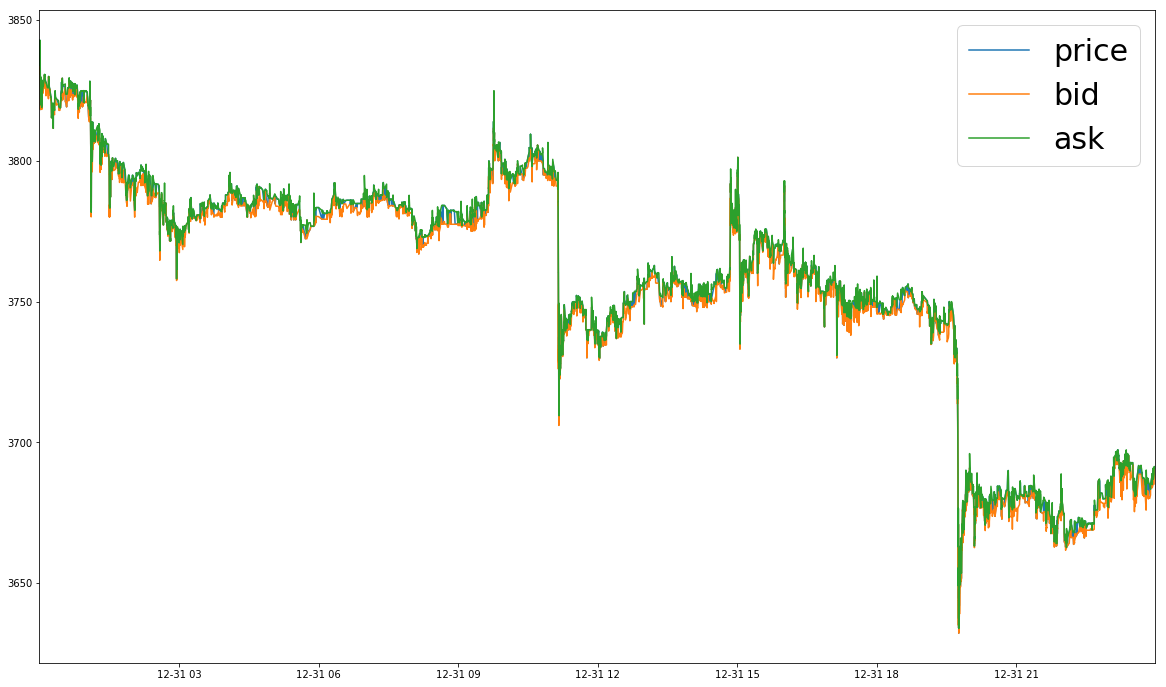

In [104]:
plot_bid_ask_price(0, -1, scatter=False, dropna=True)

In [114]:
snapshot_1_simple = snapshot_1[['time_exchange', 'asks[0].price', 'asks[0].size', 'bids[0].price', 'bids[0].size']].copy()
snapshot_1_simple['time_exchange'] = pd.to_datetime('2018-12-31T' + snapshot_1_simple['time_exchange'])
snapshot_1_simple.rename({'time_exchange': 'time_exchange_snapshot'}, axis='columns', inplace=True)

In [37]:
pd.merge_asof(trade_unique, snapshot_1_simple, left_on='time_exchange_trade', right_on='time_exchange_snapshot', allow_exact_matches=False, direction='backward').dropna()

,time_exchange_trade,price,base_amount,taker_side,time_exchange_snapshot,asks[0].price,asks[0].size,bids[0].price,bids[0].size
48,2018-12-31 00:00:56,3832.98,0.027128,SELL,2018-12-31 00:00:55.062259300,3835.11,2.000000,3832.98,2.418965
49,2018-12-31 00:00:57,3832.98,0.027128,SELL,2018-12-31 00:00:56.124829400,3835.11,2.000000,3832.98,2.391837
50,2018-12-31 00:01:00,3830.72,0.027128,BUY,2018-12-31 00:00:58.593702400,3834.97,2.000000,3832.98,2.337581
51,2018-12-31 00:01:00,3830.79,1.060000,SELL,2018-12-31 00:00:58.593702400,3834.97,2.000000,3832.98,2.337581
52,2018-12-31 00:01:07,3829.18,3.042609,SELL,2018-12-31 00:01:04.828409200,3832.60,2.000000,3830.73,1.899273
53,2018-12-31 00:01:08,3826.48,0.014701,SELL,2018-12-31 00:01:04.828409200,3832.60,2.000000,3830.73,1.899273
54,2018-12-31 00:01:13,3825.69,0.030570,BUY,2018-12-31 00:01:11.453775000,3825.69,2.415092,3825.59,2.337581
55,2018-12-31 00:01:14,3824.07,3.409000,SELL,2018-12-31 00:01:11.453775000,3825.69,2.415092,3825.59,2.337581
56,2018-12-31 00:01:14,3824.00,0.007788,SELL,2018-12-31 00:01:11.453775000,3825.69,2.415092,3825.59,2.337581
57,2018-12-31 00:01:20,3824.70,2.500000,SELL,2018-12-31 00:01:15.719616900,3825.69,2.384522,3824.70,2.500000


In [116]:
pd.merge_asof(trade_unique, quote_simple, left_on='time_exchange_trade', right_on='time_exchange_quote', allow_exact_matches=False, direction='backward').dropna()

,time_exchange_trade,taker_side,price,base_amount,time_exchange_quote,ask_px,ask_sx,bid_px,bid_sx
0,2018-12-31 00:00:01,SELL,3831.03,0.748961,2018-12-31 00:00:00.895049900,3836.04,0.115400,3831.03,0.884600
1,2018-12-31 00:00:10,SELL,3832.42,0.027127,2018-12-31 00:00:09.997343700,3835.96,0.010598,3832.32,2.000000
2,2018-12-31 00:00:11,BUY,3833.92,0.027128,2018-12-31 00:00:10.622364200,3839.33,0.082820,3832.42,3.881373
3,2018-12-31 00:00:12,SELL,3834.47,0.027128,2018-12-31 00:00:11.684903400,3833.92,0.027128,3832.86,2.300000
4,2018-12-31 00:00:13,SELL,3834.47,0.027128,2018-12-31 00:00:12.763084700,3839.31,0.017499,3834.47,0.108472
5,2018-12-31 00:00:14,SELL,3833.84,0.418600,2018-12-31 00:00:13.841289200,3839.31,0.017499,3834.47,0.081372
6,2018-12-31 00:00:14,SELL,3834.28,0.081400,2018-12-31 00:00:13.841289200,3839.31,0.017499,3834.47,0.081372
7,2018-12-31 00:00:15,BUY,3834.28,0.027128,2018-12-31 00:00:14.935084600,3839.29,0.918600,3834.28,0.081400
8,2018-12-31 00:00:15,SELL,3834.87,0.027128,2018-12-31 00:00:14.935084600,3839.29,0.918600,3834.28,0.081400
9,2018-12-31 00:00:16,SELL,3834.87,0.027128,2018-12-31 00:00:15.953102800,3839.31,0.017499,3834.87,2.300000


In [25]:
for i, row in index_span.iterrows():
    if row['next_snapshot_left'] != -1:
        snapshot_constructed = reconstruct(limitbook_full[row['snapshot_left'] : row['snapshot_right']], limitbook_full.iloc[row['snapshot_right'] : row['next_snapshot_left']])
        old, new = get_diff(snapshot_constructed, limitbook_full.iloc[row['next_snapshot_left'] : row['next_snapshot_right']])
        print(len(old-new))
        print(len(new-old))
        snapshot_real = snapshot_unstack(snapshot_50[snapshot_50['time_exchange'] >= limitbook_full['time_exchange'].iloc[row['next_snapshot_left']-1]].iloc[:1])
        old, new = get_diff(snapshot_sample(snapshot_constructed, depth=50), snapshot_real)
        print(len(old-new))
        print(len(new-old))
        print()

61
39
27
27

6
6
0
0

4
4
0
0

0
2
0
0

21
13
0
0

2
4
0
0

15
20
0
0

7
8
0
0

18
15
0
0

5
10
0
0

12
14
0
0

8
10
0
0

8
9
0
0

19
12
0
0

8
10
0
0

4
2
0
0

3
3
0
0

2
1
0
0

2
5
0
0

5
6
0
0

6
5
0
0

6
11
0
0

7
6
0
0

18
17
5
5

3
6
0
0

9
18
0
0

2
6
0
0

25
23
0
0

4
9
0
0

25
25
0
0

18
13
0
0

29
32
0
0

16
13
0
0

21
6
0
0

14
27
0
0

2
2
0
0

25
26
0
0

7
16
0
0

32
29
0
0

9
11
0
0

1
3
0
0

11
15
0
0

16
19
0
0

6
10
0
0

9
10
0
0

11
4
0
0

7
7
0
0

3
3
0
0

22
20
0
0

7
7
0
0

4
5
0
0

1
2
0
0

5
4
0
0

7
6
0
0

2
4
0
0

3
4
0
0

13
15
0
0

9
7
0
0

17
10
0
0

6
6
0
0

13
19
0
0

10
8
0
0

17
12
0
0

3
2
0
0

11
9
0
0

3
4
0
0

14
12
0
0

10
11
0
0

9
10
0
0

5
8
0
0

19
16
0
0

47
47
8
8

7
6
0
0

16
6
0
0

6
6
0
0

20
16
3
3

7
3
0
0

12
10
0
0

6
8
0
0

7
9
0
0

8
5
0
0

5
8
0
0

17
14
0
0

5
8
0
0

7
3
0
0

8
7
0
0

3
4
0
0

7
11
0
0

8
12
0
0

5
5
0
0

2
0
0
0

15
17
0
0

6
5
0
0

3
10
0
0

6
9
0
0

3
6
4
4

0
1
0
0

2
3
0
0

5
7
0
0

3
3
0
0

6
8
0
0

2
5
0
0

3


In [586]:
for i, row in index_span.iterrows():
    if row['next_snapshot_left'] != -1:
        snapshot_constructed = reconstruct(limitbook_full[row['snapshot_left'] : row['snapshot_right']], limitbook_full.iloc[row['snapshot_right'] : row['next_snapshot_left']])
        old, new = get_diff(snapshot_constructed, limitbook_full.iloc[row['next_snapshot_left'] : row['next_snapshot_right']])
        print(len(old-new))
        print(len(new-old))
        snapshot_real = snapshot_unstack(snapshot_50[snapshot_50['time_exchange'] >= limitbook_full['time_exchange'].iloc[row['next_snapshot_left']-1]].iloc[:1])
        old, new = get_diff(snapshot_sample(snapshot_constructed, depth=50), snapshot_real)
        print(len(old-new))
        print(len(new-old))
        print()

5
7760
0
0

28
35
0
0

6
6
0
0

4
4
0
0

0
2
0
0

21
13
0
0

2
4
0
0

15
20
4
4

7
8
0
0

18
15
0
0

5
10
0
0

12
14
0
0

8
10
0
0

8
9
0
0

19
12
0
0

8
10
0
0

4
2
0
0

3
3
0
0

2
1
0
0

2
5
0
0

5
6
0
0

6
5
0
0

6
11
0
0

7
6
0
0

18
17
0
0

3
6
0
0

9
18
0
0

2
6
0
0

25
23
0
0

4
9
0
0

25
25
0
0

18
13
0
0

29
32
0
0

16
13
0
0

21
6
0
0

14
27
0
0

2
2
0
0

25
26
0
0

7
16
0
0

32
29
0
0

9
11
0
0

1
3
0
0

11
15
0
0

16
19
0
0

6
10
0
0

9
10
0
0

11
4
0
0

7
7
0
0

3
3
0
0

22
20
0
0

7
7
0
0

4
5
0
0

1
2
0
0

5
4
0
0

7
6
0
0

2
4
0
0

3
4
0
0

13
15
0
0

9
7
0
0

17
10
0
0

6
6
0
0

13
19
0
0

10
8
0
0

17
12
0
0

3
2
0
0

11
9
0
0

3
4
0
0

14
12
0
0

10
11
0
0

9
10
0
0

5
8
0
0

19
16
0
0

47
47
0
0

7
6
0
0

16
6
0
0

6
6
0
0

20
16
0
0

7
3
0
0

12
10
0
0

6
8
0
0

7
9
0
0

8
5
0
0

5
8
0
0

17
14
0
0

5
8
0
0

7
3
0
0

8
7
0
0

3
4
0
0

7
11
0
0

8
12
0
0

5
5
0
0

2
0
0
0

15
17
0
0

6
5
0
0

3
10
0
0

6
9
0
0

3
6
0
0

0
1
0
0

2
3
0
0

5
7
0
0

3
3
0
0

6
8
0
0

2